# NYC Green Taxi

Problem: What speed and traffic patterns of nyc green taxi are? 

Approach: Preprocessed nyc green taxi data with imputation and time formatting, visualized the total count of trips and average speed as function of day of the month.

Result: More traffic of green taxi on weekends than weekdays.

In [46]:
import pandas as pd
year, month, day = 2017, 6, 6
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv" % (year,month)
df = pd.read_csv(url)

In [27]:
datetime_cols = df.columns[1:3]
format_dt = "%Y-%m-%dT%H:%M:%S"
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format = format_dt)
df[datetime_cols].dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
dtype: object

In [28]:
df['day'] = df['lpep_pickup_datetime'].apply(lambda x: x.day)

In [29]:
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,day
0,2,2017-06-01 00:33:45,2017-06-01 01:39:52,N,4,35,265,1,90.41,404.5,0.5,0.5,0.00,5.76,NaN,0.3,413.51,2,1.0,1
1,2,2017-06-01 00:33:55,2017-06-01 23:36:23,N,1,263,75,1,0.38,4.0,0.5,0.5,1.59,0.00,NaN,0.3,6.89,1,1.0,1
2,2,2017-06-01 00:12:07,2017-06-01 00:12:07,N,1,255,43,1,9.49,31.0,0.5,0.5,8.08,0.00,NaN,0.3,40.38,1,1.0,1
3,2,2017-06-01 00:17:26,2017-06-01 00:20:01,N,1,256,256,1,0.59,4.0,0.5,0.5,1.06,0.00,NaN,0.3,6.36,1,1.0,1
4,2,2017-06-01 00:17:22,2017-06-01 00:24:21,N,1,130,135,3,2.08,8.5,0.5,0.5,0.00,0.00,NaN,0.3,9.80,2,1.0,1
5,2,2017-06-01 00:39:41,2017-06-01 00:42:17,N,1,256,255,1,0.57,4.0,0.5,0.5,1.32,0.00,NaN,0.3,6.62,1,1.0,1
6,2,2017-06-01 00:37:31,2017-06-01 00:47:38,N,1,66,148,1,2.30,10.0,0.5,0.5,2.26,0.00,NaN,0.3,13.56,1,1.0,1
7,2,2017-06-01 00:37:05,2017-06-01 00:52:48,N,1,256,40,5,4.85,16.5,0.5,0.5,3.56,0.00,NaN,0.3,21.36,1,1.0,1
8,2,2017-06-01 00:02:16,2017-06-01 00:02:46,N,1,166,152,1,0.10,2.5,0.5,0.5,0.00,0.00,NaN,0.3,3.80,2,1.0,1
9,2,2017-06-01 00:00:38,2017-06-01 00:04:38,N,1,196,95,1,1.26,6.0,0.5,0.5,1.82,0.00,NaN,0.3,9.12,1,1.0,1


## Create distance_categorical feature 
- create a new column named distance_categorical with the following rules:
-  distance > 10   -> "high_mileage"
-  3 < distance < 10   -> "medium_mileage"
-  distance < 3   -> "low_mileage"  


In [51]:
df['distance_categorical']=['high_mileage' if x>10 else 'low_mileage' if x<3 else 'medium_mileage' for x in df['trip_distance']]


df['distance_categorical'].value_counts()

low_mileage       694179
medium_mileage    255355
high_mileage       26933
Name: distance_categorical, dtype: int64

In [52]:
df[['trip_distance','distance_categorical']].sample(5)

,trip_distance,distance_categorical
501292,0.49,low_mileage
138642,2.80,low_mileage
934457,0.95,low_mileage
885338,0.92,low_mileage
544889,1.37,low_mileage


## Preprocess passgenger_count column. 
find the most common value of passenger count (mode). Impute all the values of 0 into the mode.


In [7]:
df['passenger_count'].value_counts()  # 0 should not be here

1    25153
2     2264
5      933
3      623
6      508
4      132
0        5
8        1
Name: passenger_count, dtype: int64

In [8]:
import numpy as np
a=df['passenger_count']
for n, i in enumerate(a):
    if i == 0:
        a[n] = np.nan

/Users/shangguanshun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shangguanshun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
from statistics import mode
a.fillna(mode(a))

0        1.0
1        1.0
2        2.0
3        5.0
4        5.0
5        1.0
6        6.0
7        6.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       2.0
16       2.0
17       2.0
18       1.0
19       5.0
20       5.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       2.0
        ... 
29589    2.0
29590    1.0
29591    1.0
29592    1.0
29593    1.0
29594    1.0
29595    2.0
29596    1.0
29597    3.0
29598    2.0
29599    1.0
29600    2.0
29601    1.0
29602    1.0
29603    1.0
29604    1.0
29605    1.0
29606    2.0
29607    2.0
29608    1.0
29609    1.0
29610    1.0
29611    1.0
29612    1.0
29613    1.0
29614    1.0
29615    1.0
29616    1.0
29617    1.0
29618    1.0
Name: passenger_count, Length: 29619, dtype: float64

In [10]:
df['passenger_count'].value_counts()

1.0    25153
2.0     2264
5.0      933
3.0      623
6.0      508
4.0      132
8.0        1
Name: passenger_count, dtype: int64

## Change column names
- lpep_pickup_datetime -> Pickup_datetime   
- lpep_dropoff_datetime  -> Dropoff_datetime

In [47]:
# method 1: list comprehension and redefine df.columns
old_names = df.columns
print("before change", old_names[0:4])
# write your code here 
df.columns = ['pickup_datetime' if x == 'lpep_pickup_datetime' else 'dropoff_datetime' if x == 'lpep_dropoff_datetime' else x for x in df.columns]
print("after change", df.columns[0:4])
print()

before change Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag'],
      dtype='object')
after change Index(['VendorID', 'pickup_datetime', 'dropoff_datetime',
       'store_and_fwd_flag'],
      dtype='object')



## Delete and sort columns   
- delete columns: VendorID, 'tolls_amount', 'ehail_fee', 'improvement_surcharge'
- put these columns first, 'trip_distance','total_amount', 'payment_type' then other columns

In [48]:
print("before change:")
print(df.columns)

cols_to_deleted = ['Unnamed: 0','VendorID', 'tolls_amount', 'ehail_fee', 'improvement_surcharge']
for col in cols_to_deleted:
    if col in df.columns:
        del df[col]
        print(col, " is deleted")
    else:
        print(col, " no longer exists")
df.columns

before change:
Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'ehail_fee', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')
Unnamed: 0  no longer exists
VendorID  is deleted
tolls_amount  is deleted
ehail_fee  is deleted
improvement_surcharge  is deleted


Index(['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [49]:
col_top_three=['trip_distance','total_amount', 'payment_type']
new_columns = col_top_three + (df.columns.drop(col_top_three).tolist())
df = df[new_columns]
    
print("after change:")
print(df.columns)

after change:
Index(['trip_distance', 'total_amount', 'payment_type', 'pickup_datetime',
       'dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'trip_type'],
      dtype='object')


In [50]:
df.head(10)

,trip_distance,total_amount,payment_type,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,fare_amount,extra,mta_tax,tip_amount,trip_type
0,90.41,413.51,2,2017-06-01 00:33:45,2017-06-01 01:39:52,N,4,35,265,1,404.5,0.5,0.5,0.00,1.0
1,0.38,6.89,1,2017-06-01 00:33:55,2017-06-01 23:36:23,N,1,263,75,1,4.0,0.5,0.5,1.59,1.0
2,9.49,40.38,1,2017-06-01 00:12:07,2017-06-01 00:12:07,N,1,255,43,1,31.0,0.5,0.5,8.08,1.0
3,0.59,6.36,1,2017-06-01 00:17:26,2017-06-01 00:20:01,N,1,256,256,1,4.0,0.5,0.5,1.06,1.0
4,2.08,9.80,2,2017-06-01 00:17:22,2017-06-01 00:24:21,N,1,130,135,3,8.5,0.5,0.5,0.00,1.0
5,0.57,6.62,1,2017-06-01 00:39:41,2017-06-01 00:42:17,N,1,256,255,1,4.0,0.5,0.5,1.32,1.0
6,2.30,13.56,1,2017-06-01 00:37:31,2017-06-01 00:47:38,N,1,66,148,1,10.0,0.5,0.5,2.26,1.0
7,4.85,21.36,1,2017-06-01 00:37:05,2017-06-01 00:52:48,N,1,256,40,5,16.5,0.5,0.5,3.56,1.0
8,0.10,3.80,2,2017-06-01 00:02:16,2017-06-01 00:02:46,N,1,166,152,1,2.5,0.5,0.5,0.00,1.0
9,1.26,9.12,1,2017-06-01 00:00:38,2017-06-01 00:04:38,N,1,196,95,1,6.0,0.5,0.5,1.82,1.0


## Plot the total count of trips and average speed as function of day (1 - 30) of the month. 

In [40]:
df['trip_time_in_minutes'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).apply(lambda x: x.total_seconds()) / 60

In [41]:
df['speed'] = df['trip_distance'] / df['trip_time_in_minutes'] * 60

In [42]:
count_by_day = df.groupby("day")["trip_distance"].count()
speed_by_day = df.groupby("day")['speed'].median()

In [43]:
len(count_by_day)

30

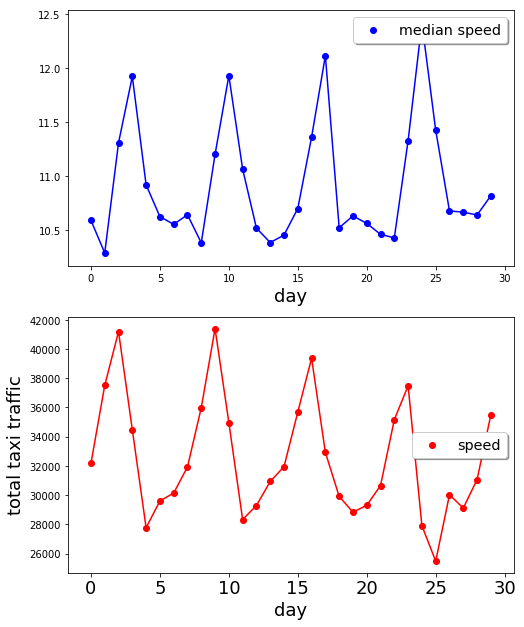

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,16))

ax1 = plt.subplot(311)
plt.scatter(range(len(count_by_day)), speed_by_day,c ='b',label = "median speed")
plt.plot(range(len(count_by_day)), speed_by_day,c ='b',label = "")
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel('day',fontsize=18)


ax2 = plt.subplot(312, sharex=ax1)
plt.scatter(range(len(count_by_day)), df.groupby("day")['speed'].count(), c ='r')
legend = plt.legend(loc='right', shadow=True, fontsize='x-large')
plt.plot(range(len(count_by_day)), df.groupby('day')['speed'].count(), c ='r')
plt.setp(ax2.get_xticklabels(),fontsize=18)
plt.setp(ax2.get_yticklabels(),fontsize=10)
plt.xlabel('day',fontsize=18)
plt.ylabel('total taxi traffic',fontsize=18)

plt.show()

## Summary  
1. There is a periodicity patten in both median speed and traffic each day. 
2. In the weekdays, the median speed is much lower than in weekends. Same as the daily traffic 
3. In this month. the overall trend for the highest median speed is increasing.And the highest daily traffic each week is decreasing.